### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# # change directory to 'master_study/analysis'
# os.chdir('master_study/analysis')

# Local imports
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



In [2]:
# Define study
STUDY_NAME = "tunescan_50cm_control_sofia_IPAC"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0123/config_final.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  normalized amplitude in xy-plane  \
beam  qx     qy                                                            
lhcb1 62.305 60.306      base_collider                             7.625   
             60.307      base_collider                             7.250   
             60.308      base_collider                             7.562   
             60.309      base_collider                             7.562   
             60.310      base_collider                             6.812   
...                                ...                               ...   
      62.328 60.327      base_collider                             4.000   
             60.329      base_collider                             4.000   
      62.329 60.326      base_collider                             4.000   
             60.327      base_collider                             4.000   
             60.328      base_collider                             4.000   

                         qx      qy   dqx   dqy  i_bunch_b1  i_bunch_b2  \
beam  qx     qy                                                           
lhcb1 62.305 60.306  62.305  60.306  10.0  10.0         NaN         NaN   
             60.307  62.305  60.307  10.0  10.0         NaN         NaN   
             60.308  62.305  60.308  10.0  10.0         NaN         NaN   
             60.309  62.305  60.309  10.0  10.0         NaN         NaN   
             60.310  62.305  60.310  10.0  10.0         NaN         NaN   
...                     ...     ...   ...   ...         ...         ...   
      62.328 60.327  62.328  60.327  10.0  10.0         NaN         NaN   
             60.329  62.328  60.329  10.0  10.0         NaN         NaN   
      62.329 60.326  62.329  60.326  10.0  10.0         NaN         NaN   
             60.327  62.329  60.327  10.0  10.0         NaN         NaN   
             60.328  62.329  60.328  10.0  10.0         NaN         NaN   

                     i_oct_b1  i_oct_b2  num_particles_per_bunch  \
beam  qx     qy                                                    
lhcb1 62.305 60.306     250.0     250.0              180000000.0   
             60.307     250.0     250.0              180000000.0   
             60.308     250.0     250.0              180000000.0   
             60.309     250.0     250.0              180000000.0   
             60.310     250.0     250.0              180000000.0   
...                       ...       ...                      ...   
      62.328 60.327     250.0     250.0              180000000.0   
             60.329     250.0     250.0              180000000.0   
      62.329 60.326     250.0     250.0              180000000.0   
             60.327     250.0     250.0              180000000.0   
             60.328     250.0     250.0              180000000.0   

                     crossing_angle  
beam  qx     qy                      
lhcb1 62.305 60.306            70.0  
             60.307            70.0  
             60.308            70.0  
             60.309            70.0  
             60.310            70.0  
...                             ...  
      62.328 60.327            70.0  
             60.329            70.0  
      62.329 60.326            70.0  
             60.327            70.0  
             60.328            70.0  

[369 rows x 12 columns]

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot


qx,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314,...,62.320,62.321,62.322,62.323,62.324,62.325,62.326,62.327,62.328,62.329
qy,,,,,,,,,,,,,,,,,,,,,
60.305,NaN,7.938,7.188,7.312,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.306,7.625,NaN,7.062,8.062,6.625,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.307,7.250,8.250,NaN,6.250,7.000,7.250,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.308,7.562,7.812,6.500,NaN,6.500,6.812,7.375,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.309,7.562,7.875,7.562,7.062,NaN,7.875,7.312,7.688,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.310,6.812,7.500,7.000,7.250,7.562,NaN,9.500,6.688,8.750,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.311,5.688,7.188,6.625,7.438,8.062,7.250,NaN,9.188,9.125,8.312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.312,7.750,7.312,6.938,8.250,7.875,9.188,8.750,NaN,8.438,8.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.313,6.688,8.188,6.812,8.250,7.500,7.688,9.625,8.875,NaN,8.562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Interpolate to fill internal missing values (do not extrapolate)
df_to_plot = df_to_plot.interpolate(method='slinear', limit = 1)

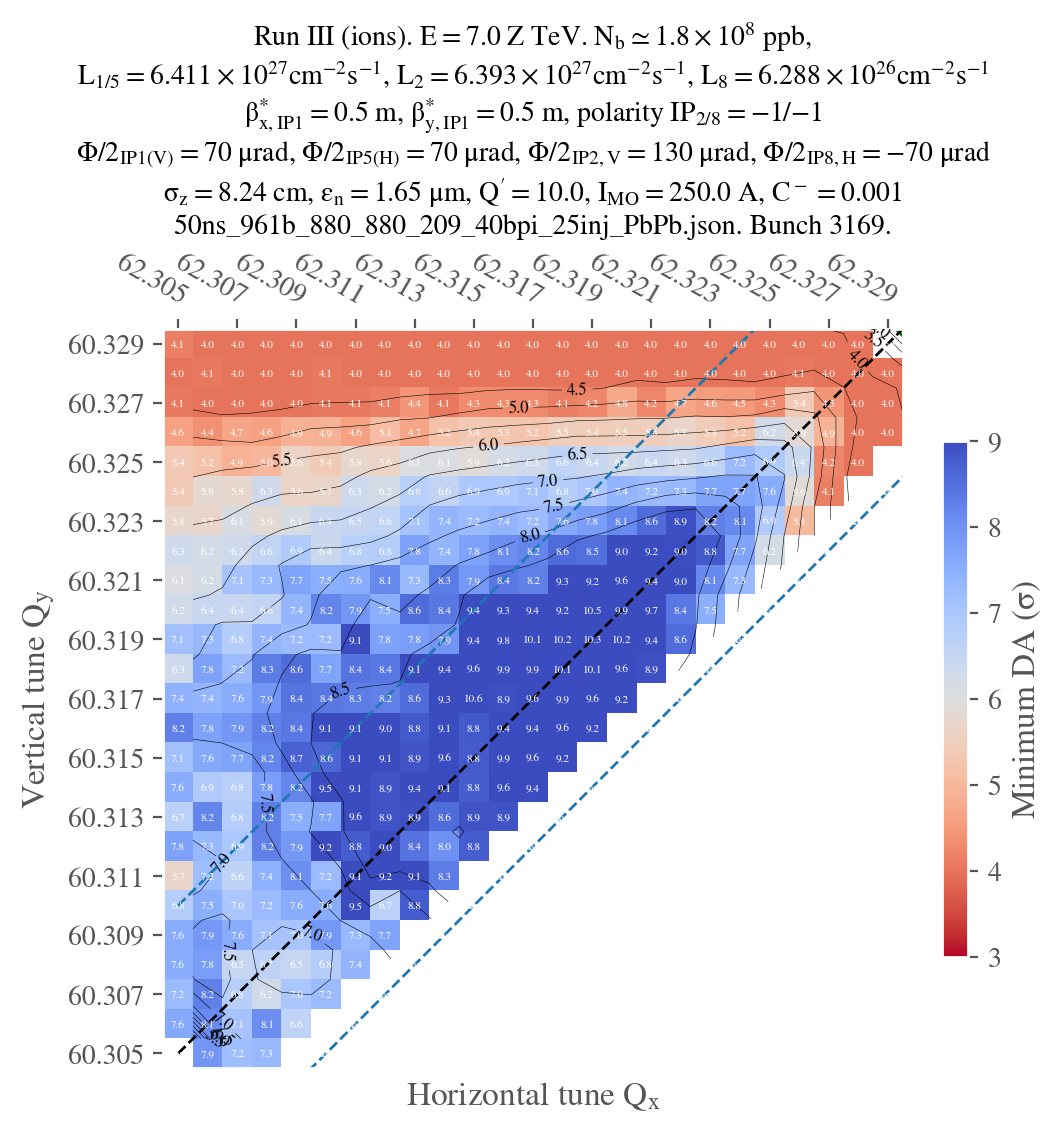

In [6]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.5,
    bety=0.5,
    Nb = True,
    green_contour = 2,
    extended_diagonal=True,
    #small_ext_diagonal=True,
    vmin = 3,
    vmax = 9.,
    smooth_symmetry = True,
)
if SAVE_STUDY_EOS:
    path_archive, path_EOS = analysis_functions.copy_study_on_eos(STUDY_NAME)
    #analysis_functions.archive_and_clean(path_archive, path_EOS)